In [1]:
import pandas as pd
from sentiment_analysis_spanish import sentiment_analysis
import datetime


In [2]:
df = pd.read_csv("consolidado_cantidad_casos_criminalidad_por_anio_mes.csv", sep = ";")

In [3]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + datetime.timedelta(n)

start_dt = datetime.date(2003, 1, 1)
end_dt = datetime.date(2008, 12, 1)
for dt in daterange(start_dt, end_dt):
    df.drop(df[dt.strftime("%Y-%m") == df["Fecha_hecho"]].index, inplace=True)

In [4]:
nums = []
dates = []
for date in df['Fecha_hecho'].unique():
    df2 = pd.read_csv(date + "_clean.csv", encoding = "latin")
    nums.append(df2["tweet"].count())
    dates.append(date)
df3 = pd.DataFrame({"dates": dates,  "count": nums})

In [5]:
df3["count"].mean()

424.2875816993464

In [6]:
df[df["Conducta"] == "Homicidio"]

,Fecha_hecho,Conducta,Cantidad_casos
295,2009-01,Homicidio,104
296,2009-02,Homicidio,110
297,2009-03,Homicidio,113
298,2009-04,Homicidio,186
299,2009-05,Homicidio,209
...,...,...,...
443,2021-05,Homicidio,37
444,2021-06,Homicidio,44
445,2021-07,Homicidio,28
446,2021-08,Homicidio,30


In [7]:
df["Cantidad_casos"] = pd.to_numeric(df["Cantidad_casos"])

In [8]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [9]:
training_set = pd.DataFrame({"length": range(1,500)})
for date in df['Fecha_hecho'].unique():
    df4 = pd.read_csv(date + "_clean.csv", encoding = "latin")
    sentiment_list = []
    for tweet in df4["tweet"]: 
        sentiment_list.append(sentiment.sentiment(tweet))
    training_set[date] = pd.Series(sentiment_list)

In [10]:
training_set = training_set.fillna(.5)
training_set.drop("length", axis = 1, inplace = True)

In [11]:
training_set = training_set.T

In [12]:
 Homicides = df[df["Conducta"] == "Homicidio"]["Cantidad_casos"]

In [13]:
training_set

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
2009-01,7.571231e-06,0.210686,1.078549e-01,0.838480,0.001233,0.093317,0.449385,0.000015,0.602592,4.872802e-01,...,0.500000,5.000000e-01,0.500000,0.500000,0.500000,0.500000,5.000000e-01,0.500000,0.500000,5.000000e-01
2009-02,5.365300e-01,0.296440,2.717961e-02,0.002803,0.004004,0.952857,0.006412,0.741496,0.297196,4.155509e-01,...,0.500000,5.000000e-01,0.500000,0.500000,0.500000,0.500000,5.000000e-01,0.500000,0.500000,5.000000e-01
2009-03,2.120335e-01,0.497892,1.252861e-03,0.000197,0.778197,0.487280,0.437548,0.012598,0.476638,4.108120e-01,...,0.500000,5.000000e-01,0.500000,0.500000,0.500000,0.500000,5.000000e-01,0.500000,0.500000,5.000000e-01
2009-04,2.515014e-01,0.029786,6.934223e-02,0.630631,0.061294,0.487280,0.005267,0.497892,0.073071,7.918687e-04,...,0.500000,5.000000e-01,0.500000,0.500000,0.500000,0.500000,5.000000e-01,0.500000,0.500000,5.000000e-01
2009-05,3.597197e-03,0.002655,7.928068e-01,0.046609,0.021849,0.000121,0.314300,0.043096,0.002655,4.309571e-02,...,0.500000,5.000000e-01,0.500000,0.500000,0.500000,0.500000,5.000000e-01,0.500000,0.500000,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05,4.646954e-05,0.074425,6.874465e-04,0.149023,0.000468,0.867639,0.374000,0.000118,0.010878,6.995389e-01,...,0.000279,2.000325e-07,0.334302,0.000008,0.501740,0.009607,3.247803e-02,0.634823,0.003104,7.607403e-03
2021-06,4.623355e-01,0.999960,1.009327e-01,0.059407,0.956348,0.999930,0.533377,0.024706,0.067701,6.487025e-07,...,0.000218,5.159437e-01,0.181532,0.000003,0.998741,0.028323,3.111479e-08,0.695864,0.183958,2.143078e-19
2021-07,5.116181e-01,0.372685,4.933628e-01,0.060660,0.173895,0.017999,0.108951,0.000011,0.000911,4.329576e-02,...,0.500000,5.000000e-01,0.500000,0.500000,0.500000,0.500000,5.000000e-01,0.500000,0.500000,5.000000e-01
2021-08,5.286088e-08,0.000337,4.855032e-08,0.515944,0.991556,0.081692,0.342408,0.101418,0.128402,5.568924e-01,...,0.500000,5.000000e-01,0.500000,0.500000,0.500000,0.500000,5.000000e-01,0.500000,0.500000,5.000000e-01


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = training_set
y = Homicides

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train= scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_train.shape

(107, 499)

In [22]:
X_test.shape

(46, 499)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [24]:
import numpy as np

In [25]:
model = Sequential()
model.add(Dense(units=1000,activation='sigmoid'))

model.add(Dense(units=500,activation='sigmoid'))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mse')

In [26]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 10258.1768 - val_loss: 6839.0454
Epoch 2/400
1/1 [==============================] - 0s 85ms/step - loss: 10159.8711 - val_loss: 6833.7026
Epoch 3/400
1/1 [==============================] - 0s 78ms/step - loss: 10153.7715 - val_loss: 6833.3647
Epoch 4/400
1/1 [==============================] - 0s 73ms/step - loss: 10153.3867 - val_loss: 6833.3208
Epoch 5/400
1/1 [==============================] - 0s 68ms/step - loss: 10153.3350 - val_loss: 6833.3096
Epoch 6/400
1/1 [==============================] - 0s 64ms/step - loss: 10153.3232 - val_loss: 6833.3071
Epoch 7/400
1/1 [==============================] - 0s 79ms/step - loss: 10153.3203 - val_loss: 6833.3057
Epoch 8/400
1/1 [==============================] - 0s 90ms/step - loss: 10153.3203 - val_loss: 6833.3052
Epoch 9/400
1/1 [==============================] - 0s 78ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 10/400
1/1 [==============================] - 0s 77

1/1 [==============================] - 0s 68ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 79/400
1/1 [==============================] - 0s 60ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 80/400
1/1 [==============================] - 0s 54ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 81/400
1/1 [==============================] - 0s 69ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 82/400
1/1 [==============================] - 0s 76ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 83/400
1/1 [==============================] - 0s 77ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 84/400
1/1 [==============================] - 0s 70ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 85/400
1/1 [==============================] - 0s 88ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 86/400
1/1 [==============================] - 0s 52ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 87/400
1/1 [==============================] - 0s 62ms

Epoch 155/400
1/1 [==============================] - 0s 56ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 156/400
1/1 [==============================] - 0s 60ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 157/400
1/1 [==============================] - 0s 57ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 158/400
1/1 [==============================] - 0s 56ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 159/400
1/1 [==============================] - 0s 58ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 160/400
1/1 [==============================] - 0s 66ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 161/400
1/1 [==============================] - 0s 67ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 162/400
1/1 [==============================] - 0s 61ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 163/400
1/1 [==============================] - 0s 55ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 164/400
1/1 [==================

1/1 [==============================] - 0s 63ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 232/400
1/1 [==============================] - 0s 80ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 233/400
1/1 [==============================] - 0s 144ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 234/400
1/1 [==============================] - 0s 80ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 235/400
1/1 [==============================] - 0s 69ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 236/400
1/1 [==============================] - 0s 57ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 237/400
1/1 [==============================] - 0s 58ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 238/400
1/1 [==============================] - 0s 66ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 239/400
1/1 [==============================] - 0s 57ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 240/400
1/1 [==============================]

1/1 [==============================] - 0s 51ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 308/400
1/1 [==============================] - 0s 74ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 309/400
1/1 [==============================] - 0s 53ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 310/400
1/1 [==============================] - 0s 73ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 311/400
1/1 [==============================] - 0s 60ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 312/400
1/1 [==============================] - 0s 49ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 313/400
1/1 [==============================] - 0s 66ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 314/400
1/1 [==============================] - 0s 70ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 315/400
1/1 [==============================] - 0s 49ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 316/400
1/1 [==============================] 

1/1 [==============================] - 0s 54ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 384/400
1/1 [==============================] - 0s 56ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 385/400
1/1 [==============================] - 0s 50ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 386/400
1/1 [==============================] - 0s 68ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 387/400
1/1 [==============================] - 0s 58ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 388/400
1/1 [==============================] - 0s 60ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 389/400
1/1 [==============================] - 0s 53ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 390/400
1/1 [==============================] - 0s 75ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 391/400
1/1 [==============================] - 0s 52ms/step - loss: 10153.3174 - val_loss: 6833.3042
Epoch 392/400
1/1 [==============================] 

In [27]:
losses = pd.DataFrame(model.history.history)

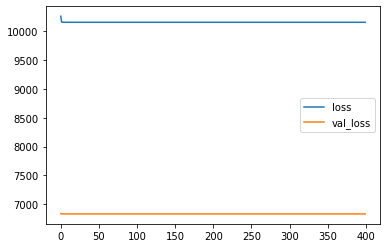

In [28]:
losses.plot()

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [30]:
predictions = model.predict(X_test)

In [31]:
mean_absolute_error(y_test,predictions)

71.52173962282097

In [32]:
np.sqrt(mean_squared_error(y_test,predictions))

82.6638035531544

In [33]:
explained_variance_score(y_test,predictions)

2.236502094632442e-10

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

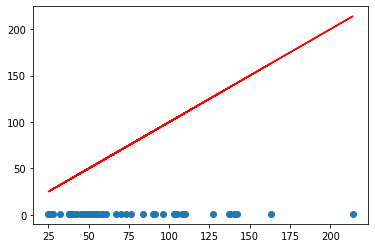

In [35]:
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')